In [ ]:
import collections
from collections import OrderedDict
import pandas as pd
import time as tm

In [2]:
run -i "windows_door_algorithm.py"

In [3]:
data_size = 500
compressor = WindowsDoorCompression(data_size)

In [4]:
df = pd.read_csv('data/sample1.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
data = {}
data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

for index, row in df.iterrows():
    data[index] = row['Counter']

In [5]:
t0 = tm.time()

exception = compressor._run_exception(data)

t1 = tm.time()

print("{} {}".format(t0, " seconds time elapsed in running exception."))
print("{} {}".format(t1, " seconds time elapsed in running exception."))

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(exception)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(exception), "data points remaining"))

1549753469.824693  seconds time elapsed in running exception.
1549753469.8800588  seconds time elapsed in running exception.
0.055365800857543945  seconds time elapsed in running exception.
5960 number of data points discarded as part of exception window
510 data points remaining


In [6]:
exception_modified = {}

for time, value in exception.items():
    exception_modified[time] = [time, value]

exception_df = pd.DataFrame.from_dict(exception_modified, orient='index')
exception_df.columns = ['Date', 'Counter']
exception_df.set_index('Date', inplace=True)

In [7]:
t0 = tm.time()

compression = compressor._run_compression(data)

t1 = tm.time()

print("{} {}".format(t0, " seconds time elapsed in running exception."))
print("{} {}".format(t1, " seconds time elapsed in running exception."))

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(compression)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(compression), "data points remaining"))

1549753471.219104  seconds time elapsed in running exception.
1549753475.6905868  seconds time elapsed in running exception.
4.471482753753662  seconds time elapsed in running exception.
5937 number of data points discarded as part of exception window
533 data points remaining


In [8]:
compression_modified = {}

for time, value in compression.items():
    compression_modified[time] = [time, value]
    
compression_df = pd.DataFrame.from_dict(compression_modified, orient='index')
compression_df.columns = ['Date', 'Counter']
compression_df.set_index('Date', inplace=True)

In [9]:
t0 = tm.time()

hybrid = compressor._run_hybrid(data)

t1 = tm.time()

print("{} {}".format(t0, " seconds time elapsed in running exception."))
print("{} {}".format(t1, " seconds time elapsed in running exception."))

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

1549753476.589844  seconds time elapsed in running exception.
1549753481.1592278  seconds time elapsed in running exception.
4.569383859634399  seconds time elapsed in running exception.
5937 number of data points discarded as part of exception window
533 data points remaining


In [10]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'inf', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


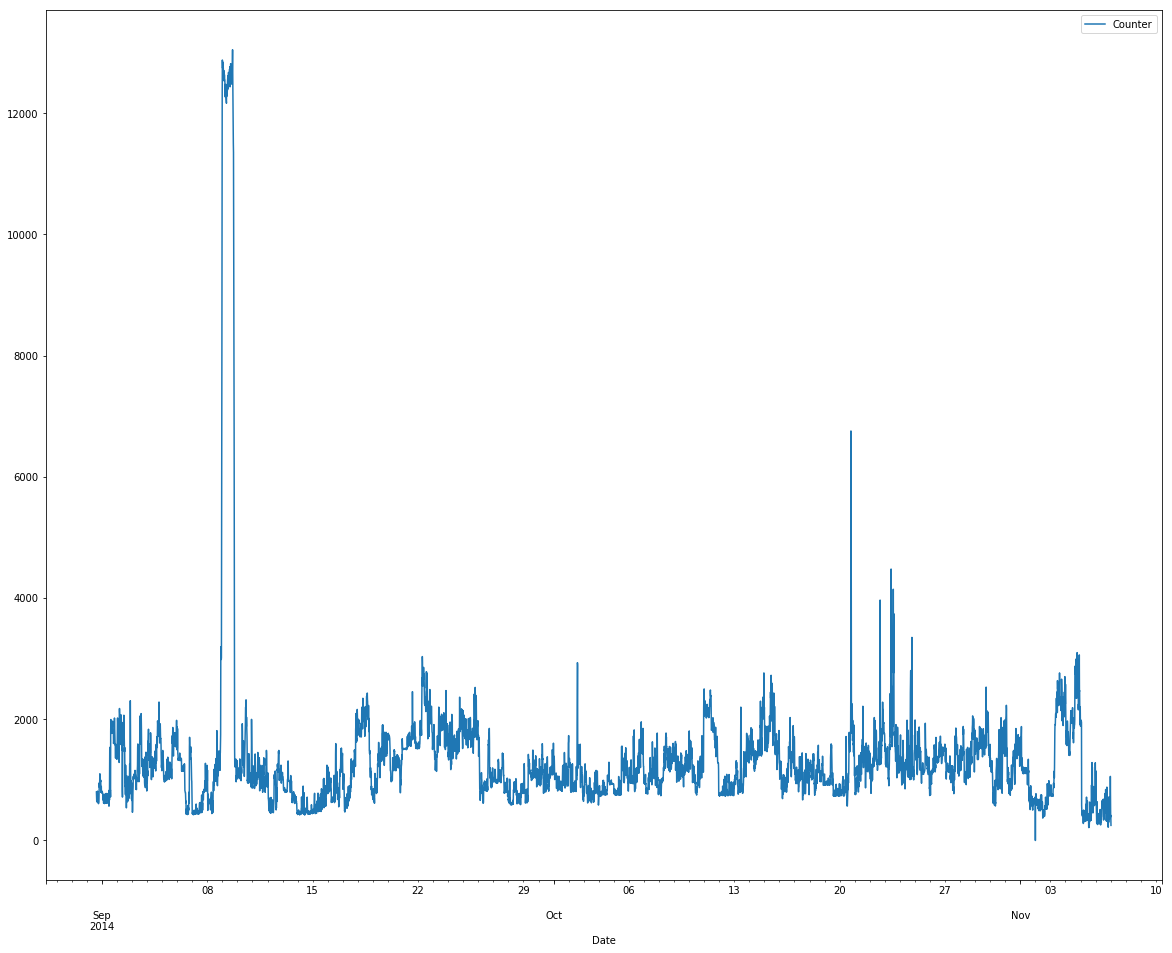

In [11]:
%pylab inline
rcParams['figure.figsize'] = [20, 16]
df.plot()

Populating the interactive namespace from numpy and matplotlib


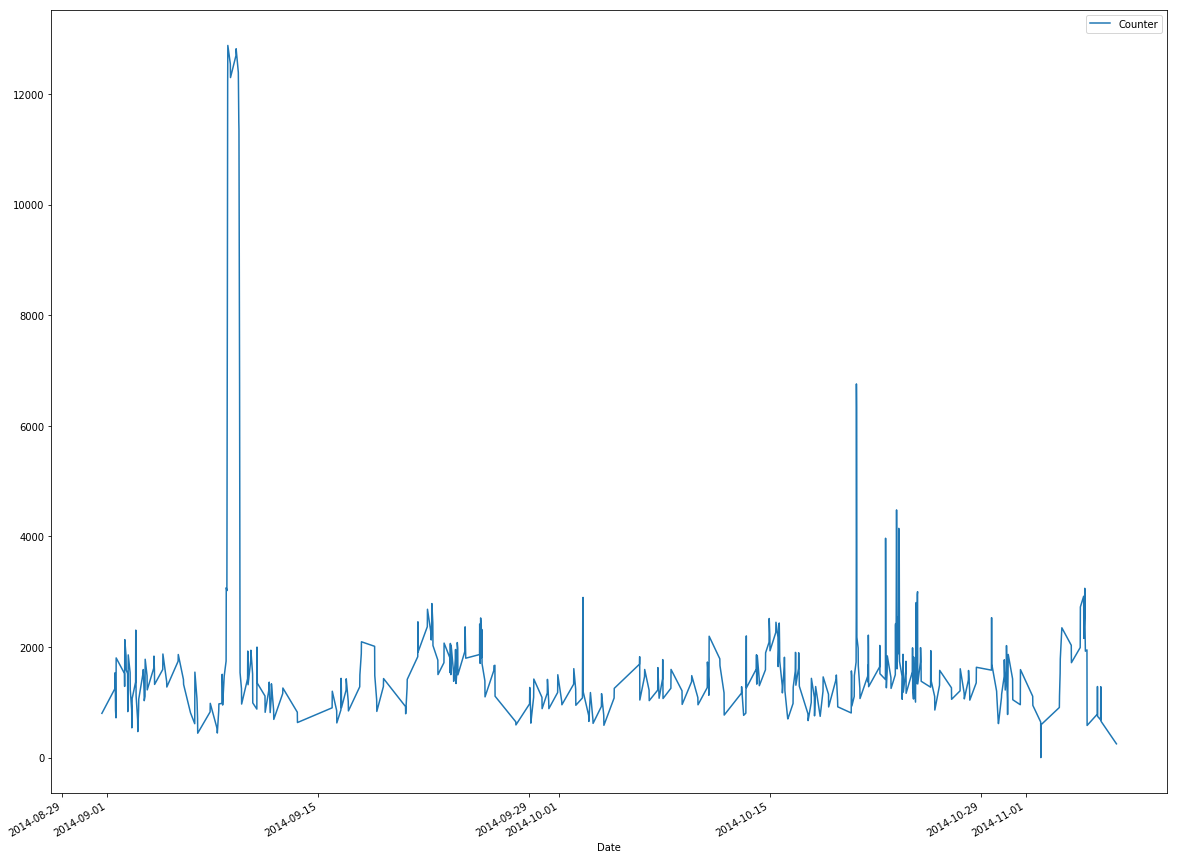

In [12]:
%pylab inline
rcParams['figure.figsize'] = [20, 16]
exception_df.plot()

Populating the interactive namespace from numpy and matplotlib


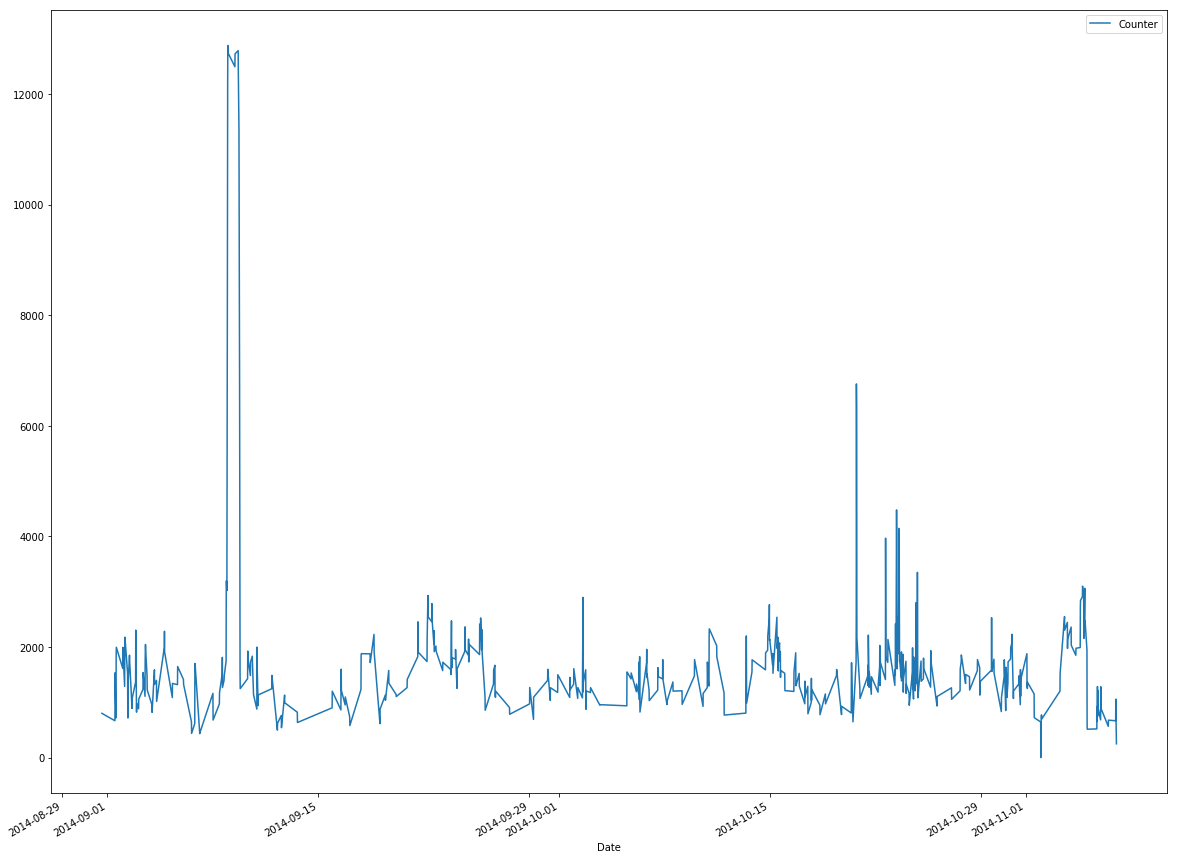

In [13]:
%pylab inline
rcParams['figure.figsize'] = [20, 16]
compression_df.plot()

Populating the interactive namespace from numpy and matplotlib


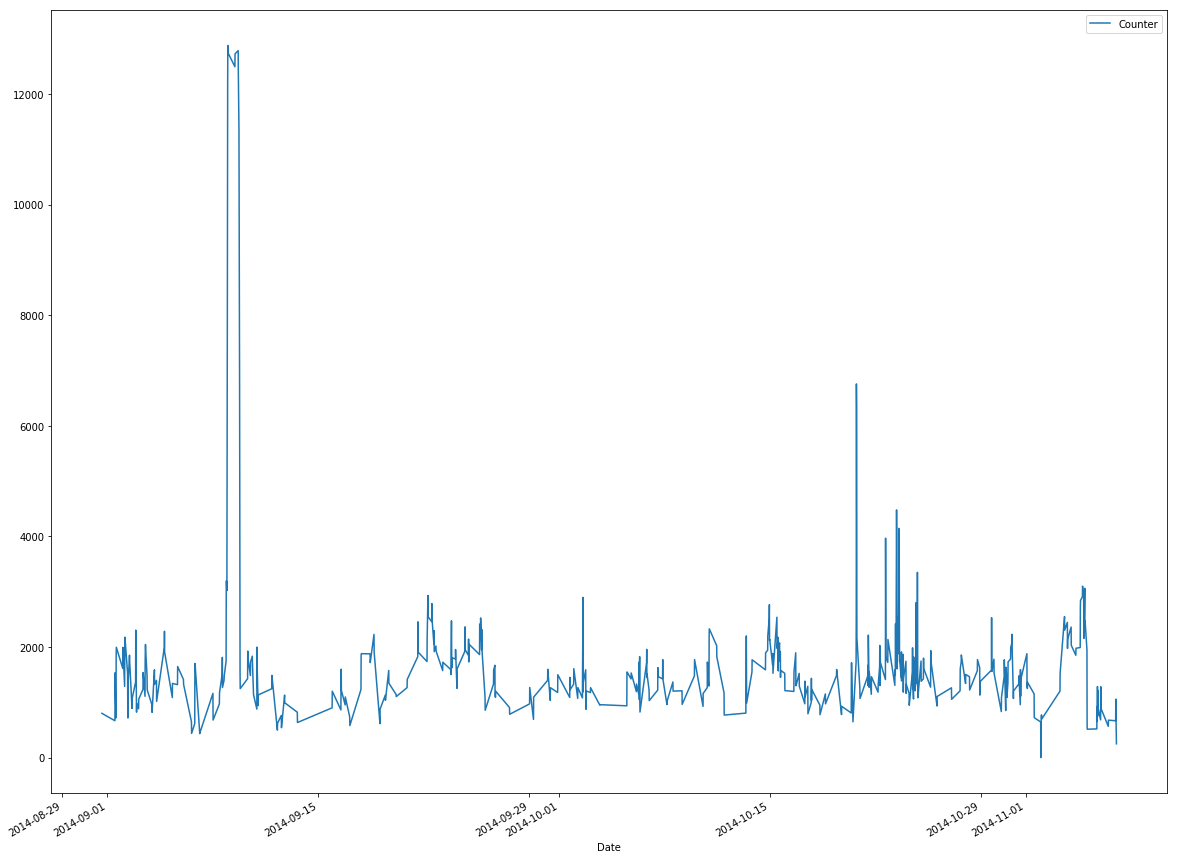

In [14]:
%pylab inline
rcParams['figure.figsize'] = [20, 16]
hybrid_df.plot()